In [131]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [132]:
!pip install pmdarima

In [133]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=SAHAS&resolution=1D&rangeStartDate=1642411546&rangeEndDate=1770545453&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("sahas.json", "w") as f:
    json.dump(data, f)

In [134]:
companies = ["/content/sahas.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642452300, 1642538700, 1642625100, 1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 165359790

In [135]:
df = pd.read_csv("sahas.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

942


In [136]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-17,495.87,498.17,505.05,487.45,50062.0
2022-01-18,497.40,493.57,507.35,486.69,39260.0
2022-01-19,485.92,478.26,497.40,475.36,39319.0
2022-01-20,470.69,484.01,486.69,470.69,44219.0
2022-01-23,489.74,477.50,497.40,477.50,28508.0


In [137]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-02-02,560.0,562.5,590.0,560.0,87207.0
2026-02-03,557.8,558.9,567.0,555.0,65600.0
2026-02-04,552.0,557.6,564.0,552.0,50982.0
2026-02-05,547.7,563.0,563.9,547.7,70559.0
2026-02-08,557.1,564.9,568.0,557.1,64425.0


In [138]:
type(df)

pandas.core.frame.DataFrame

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2022-01-17 to 2026-02-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    942 non-null    float64
 1   Close   942 non-null    float64
 2   High    942 non-null    float64
 3   Low     942 non-null    float64
 4   Volume  942 non-null    float64
dtypes: float64(5)
memory usage: 44.2 KB


<Axes: xlabel='Date'>

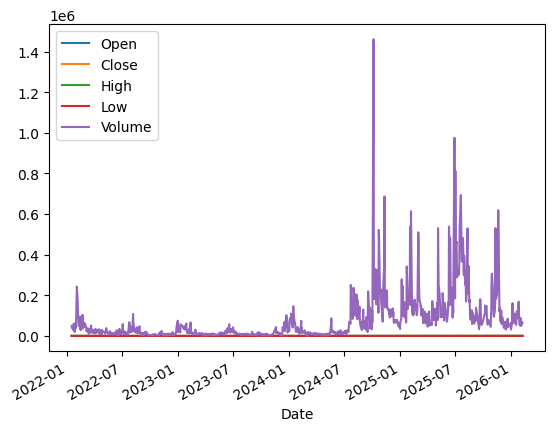

In [140]:
df.plot()

In [141]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"SAHAS {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [142]:
type(df['Close'])

pandas.core.series.Series

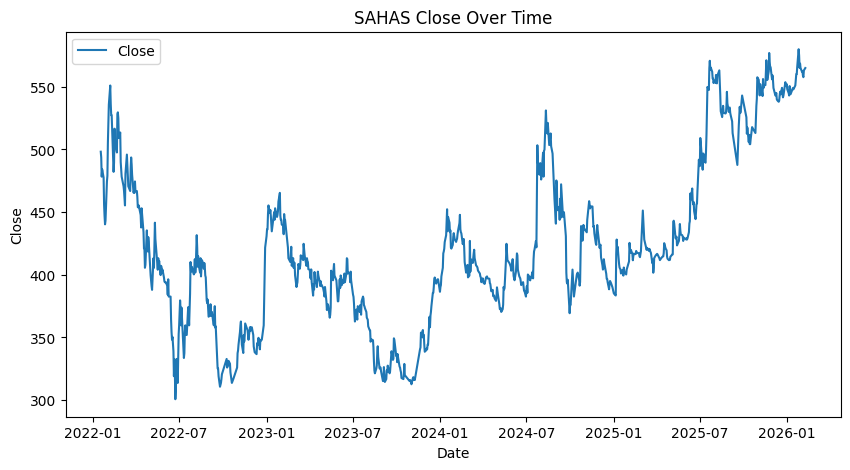

In [143]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")

##DICKEY FULLER TEST

In [144]:
from statsmodels.tsa.stattools import adfuller

In [145]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [146]:
adf_test(df['Close'])

ADF Statistic: -1.9091776397353173
p-value: 0.327756053104305
The series is not stationary.


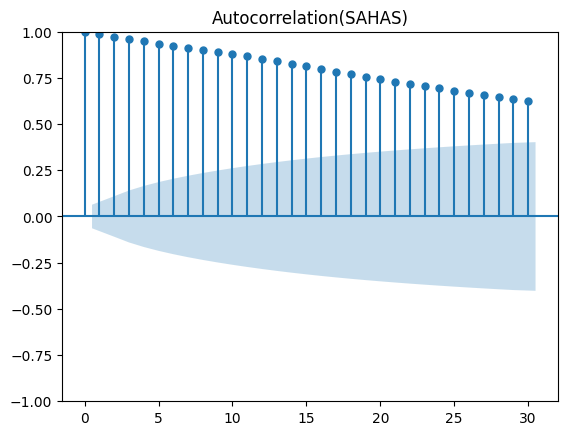

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])
plt.title("Autocorrelation(SAHAS)")
plt.show()

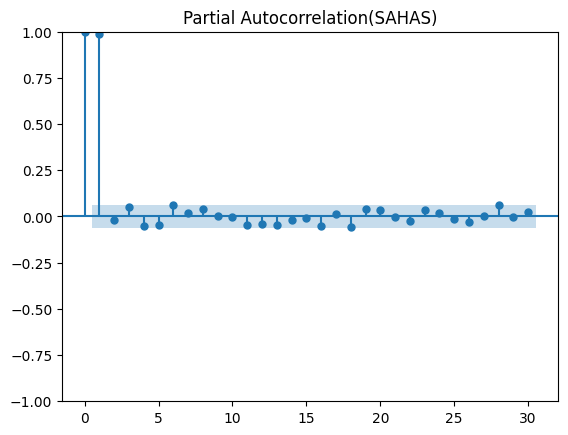

In [148]:
pacf = plot_pacf(df['Close'])
plt.title("Partial Autocorrelation(SAHAS)")
plt.show()

In [149]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [150]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-17,495.87,498.17,505.05,487.45,50062.0,NaN
2022-01-18,497.40,493.57,507.35,486.69,39260.0,-4.60
2022-01-19,485.92,478.26,497.40,475.36,39319.0,-15.31
2022-01-20,470.69,484.01,486.69,470.69,44219.0,5.75
2022-01-23,489.74,477.50,497.40,477.50,28508.0,-6.51


In [151]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -6.490006308419322
p-value: 1.2333918193411702e-08
The series is stationary.


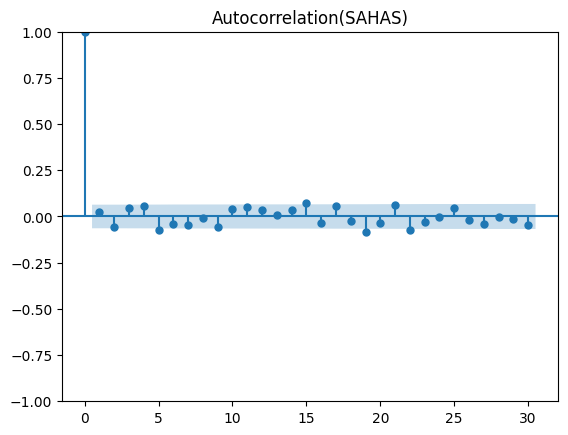

In [152]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)
plt.title("Autocorrelation(SAHAS)")
plt.show()

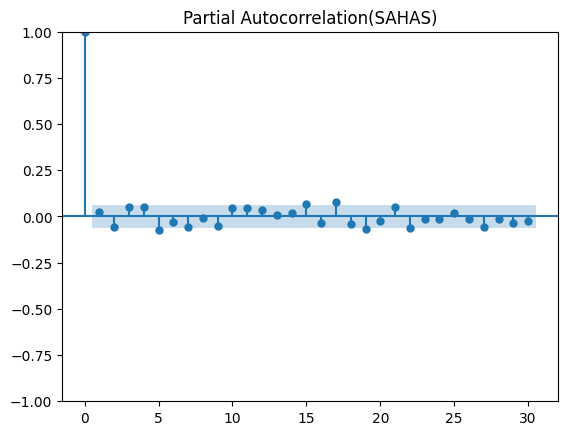

In [153]:
result = plot_pacf(data)
plt.title("Partial Autocorrelation(SAHAS)")
plt.show()

<Axes: xlabel='Date'>

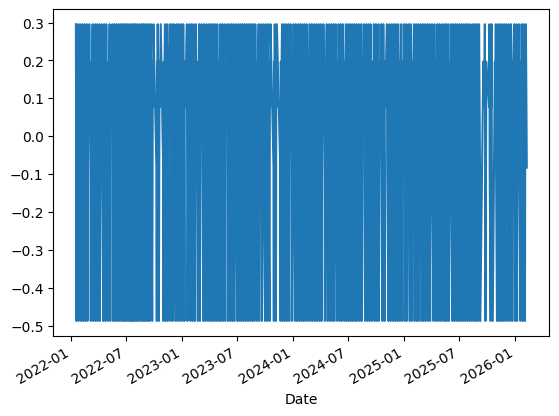

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(df['Close'],period=5)
decompose_result.seasonal.plot()

In [155]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
close=df['Close']
res = ARIMA(close, order=(0,1,0)).fit()
acorr_ljungbox(res.resid, lags=[10,15,20], return_df=True)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,lb_stat,lb_pvalue
10,6.423361,0.778529
15,12.606529,0.632660
20,16.871434,0.661306


In [156]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])

In [157]:
testing_data

[411.69,
 412.27,
 412.85,
 414.3,
 414.68,
 417.23,
 425.19,
 420.93,
 420.19,
 419.56,
 414.5,
 412.84,
 411.64,
 411.82,
 411.86,
 414.36,
 416.22,
 416.24,
 441.63,
 443.14,
 441.04,
 429.0,
 430.38,
 423.42,
 424.39,
 427.03,
 427.03,
 432.35,
 440.49,
 435.15,
 432.14,
 431.57,
 430.35,
 426.99,
 429.68,
 428.2,
 429.07,
 428.09,
 429.0,
 433.93,
 440.78,
 442.79,
 464.82,
 459.92,
 468.82,
 458.89,
 456.2,
 458.03,
 450.73,
 444.39,
 450.85,
 456.32,
 456.64,
 466.98,
 491.79,
 486.73,
 486.69,
 509.09,
 504.96,
 489.73,
 483.8,
 496.73,
 496.14,
 490.92,
 489.38,
 498.6,
 511.59,
 528.96,
 549.81,
 547.37,
 564.79,
 570.68,
 563.64,
 565.29,
 561.95,
 556.39,
 556.41,
 552.93,
 554.91,
 553.17,
 559.39,
 552.9,
 552.69,
 558.81,
 563.06,
 553.66,
 543.67,
 530.43,
 525.78,
 531.06,
 534.74,
 529.41,
 529.07,
 528.64,
 529.21,
 534.58,
 545.9,
 536.72,
 529.89,
 533.02,
 533.4,
 529.05,
 527.19,
 522.32,
 513.03,
 487.6,
 519.03,
 533.97,
 528.93,
 530.17,
 542.98,
 525.62,
 512

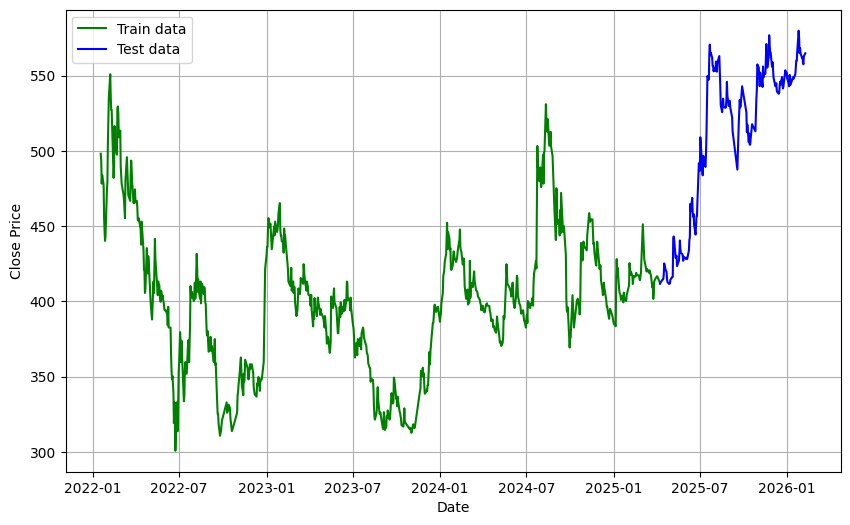

In [158]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [159]:
model_predictions=[]
n_test_obser = len(testing_data)

In [160]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(0,1,0))
    model_fit = model.fit()

    output = model_fit.forecast(steps=1)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])

In [161]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  941
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3424.702
Date:                Tue, 10 Feb 2026   AIC                           6851.405
Time:                        07:11:36   BIC                           6856.251
Sample:                             0   HQIC                          6853.252
                                - 941                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        85.5195      2.718     31.464      0.000      80.192      90.847
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               274.76
Prob(Q):                              0.50   Pr

In [162]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)

<class 'list'>
(189,)
[np.float64(413.08), np.float64(411.69), np.float64(412.27), np.float64(412.85), np.float64(414.3), np.float64(414.68), np.float64(417.23), np.float64(425.19), np.float64(420.93), np.float64(420.19), np.float64(419.56), np.float64(414.5), np.float64(412.84), np.float64(411.64), np.float64(411.82), np.float64(411.86), np.float64(414.36), np.float64(416.22), np.float64(416.24), np.float64(441.63), np.float64(443.14), np.float64(441.04), np.float64(429.0), np.float64(430.38), np.float64(423.42), np.float64(424.39), np.float64(427.03), np.float64(427.03), np.float64(432.35), np.float64(440.49), np.float64(435.15), np.float64(432.14), np.float64(431.57), np.float64(430.35), np.float64(426.99), np.float64(429.68), np.float64(428.2), np.float64(429.07), np.float64(428.09), np.float64(429.0), np.float64(433.93), np.float64(440.78), np.float64(442.79), np.float64(464.82), np.float64(459.92), np.float64(468.82), np.float64(458.89), np.float64(456.2), np.float64(458.03), np.

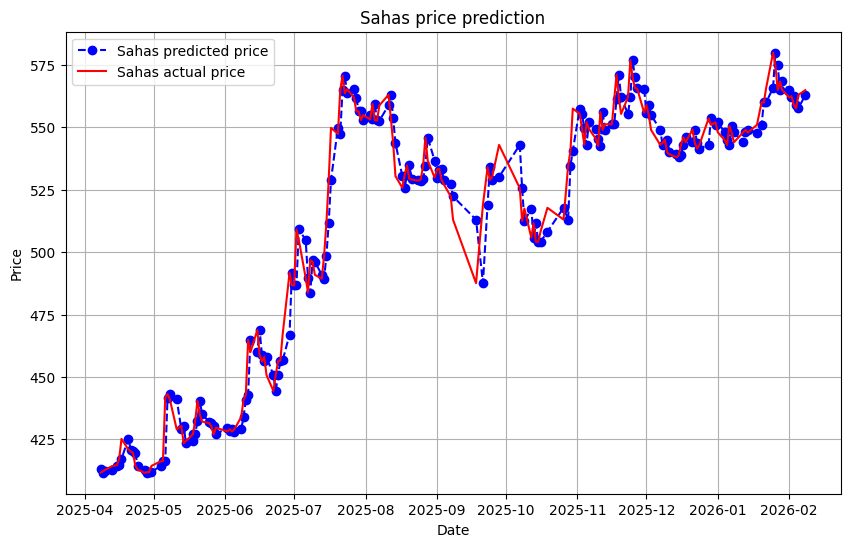

In [163]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='Sahas predicted price')
plt.plot(date_range, testing_data,color='red',label='Sahas actual price')

plt.title('Sahas price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [164]:

mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.011087620616545304


In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE from arima for sahas:", rmse)
mae = mean_absolute_error(testing_data,model_predictions)
print("MAE from arima for sahas:", mae)

RMSE from arima for sahas: 8.017624831364207
MAE from arima for sahas: 5.687830687830689


In [166]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(0,1,0))
final_model_fit = final_model.fit()

# --- Forecast next 5 days with confidence intervals ---
forecast = final_model_fit.get_forecast(steps=1)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



# --- Create future dates starting after last date in df ---
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# --- Interactive plot with plotly ---
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # light pink
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()

# --- Print next day prediction safely ---
print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 564.9


In [167]:
print(forecast)

In [168]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Suppose df['Close'] has your stock prices
# Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# --- Step 1: Use auto_arima to find best p,d,q ---
auto_model = pm.auto_arima(
    df['Close'],
    start_p=0, max_p=30,
    start_q=0, max_q=30,
    d=None,               # if None, automatically test for differencing
    seasonal=False,       # change to True if you suspect seasonality
    stepwise=True,        # faster search
    suppress_warnings=True,
    trace=True            # prints search progress
)

print("Best ARIMA order:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6859.678, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6861.226, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6861.167, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6857.733, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6861.782, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.849 seconds
Best ARIMA order: (0, 1, 0)


In [169]:
import pickle
with open("arima_model_feb_sahas.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")

Model saved as arima_model.pkl
